In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from   time import time
from   torchvision import datasets, transforms
from   torch import nn, optim

In [2]:
transform   = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset    = datasets.MNIST('train', download = True, train = True , transform = transform)
valset      = datasets.MNIST('val  ', download = True, train = False, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
valloader   = torch.utils.data.DataLoader(valset  , batch_size = 64, shuffle = True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [4]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        
        # fully connected layer, output 10 classes
        self.fc  = nn.Linear(32 * 7 * 7, 10)
        self.out = nn.LogSoftmax(dim = 1)
        

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        x = self.fc(x)   
        output = self.out(x)
        return output# , x    # return x for visualization

In [6]:
model = CNN()

criterion      = nn.NLLLoss()
images, labels = next(iter(trainloader))
images         = images.view(64, 1, 28, 28)

In [7]:
optimizer = optim.Adam(model.parameters(), lr = 1e-2)
time0     = time()
epochs    = 5

for e in range(1, epochs + 1):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(-1, 1, 28, 28)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()

    print(f"Epoch {e:3d} - Training loss: {running_loss / len(trainloader)}")

m, s = map(int, divmod(time() - time0, 60))
if s == 60:
    m += 1
    s  = 0
print(f"\nTraining Time = {m:d}m {s:d}s")

Epoch   1 - Training loss: 0.13586660814017298
Epoch   2 - Training loss: 0.06940776916777543
Epoch   3 - Training loss: 0.06387886052136682
Epoch   4 - Training loss: 0.0677218293960695
Epoch   5 - Training loss: 0.060501646595962494

Training Time = 4m 3s


In [10]:
y_hat  = []
y_true = []
with torch.no_grad():
    for images, label in valloader:
        images = images.view(-1, 1, 28, 28)
        logp   = model(images)
        y_hat.append(logp.numpy().argmax(axis = -1))
        y_true.append(label.numpy())

y_hat  = np.concatenate(y_hat)
y_true = np.concatenate(y_true)

(y_hat == y_true).mean()

0.9811

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_hat, normalize = 'true')

cm.round(2)

array([[0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.98, 0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.97, 0.  , 0.  , 0.  , 0.01, 0.01],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.98, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.98, 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.01, 0.  , 0.97]])

In [12]:
r = cm.shape[0]
min_list = []
for i in range(r):
    min_list.append(max(cm.round(2)[i]))


    
min_value = min(min_list)
min_index = min_list.index(min_value)

print("min_value is {} and the corresponding index is {}.".format(min_value, min_index))

min_value is 0.97 and the corresponding index is 4.


### Tutorial

In [50]:
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [54]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
X_train.shape
# 28 by 28 pixel images and having 60000 numbers

(60000, 28, 28)

In [45]:
X_test.shape

(10000, 28, 28)

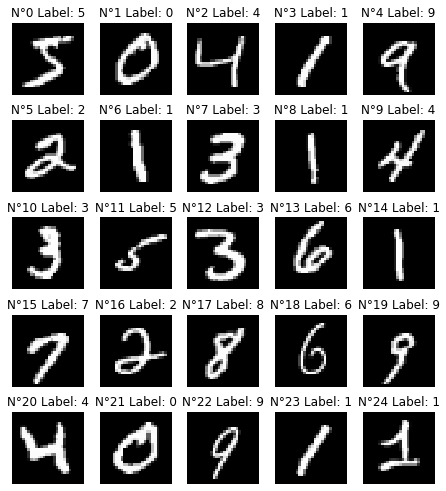

In [56]:
images_and_labels = list(zip(X_train, y_train))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=1.6, hspace=.35)
for i, (image, label) in enumerate(images_and_labels[:25]):
    plt.subplot(5, 5, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    plt.title('N°%i Label: %i' % (i, label))


In [57]:
# flatten
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [58]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test,10)

In [59]:
y_train.shape

(60000, 10)

In [60]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))